# Preface

 
 YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. [According to Variety magazine](https://variety.com/2017/digital/news/youtube-2017-top-trending-videos-music-videos-1202631416/), “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. In this paper we will explore Youtube trends using [Trending YouTube Video Statistics](https://www.kaggle.com/datasets/datasnaek/youtube-new) obtained from Kaggle.com.


# 1. Exploring and Importing

Import essential modules:

In [1]:
# modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

# general options
sns.set()
plt.style.use('bmh')



First let's unpack the archive and check it content:

In [2]:
print([file for file in os.listdir() if
       (file.endswith('.csv')) | (file.endswith('.json'))])

['CAvideos.csv', 'CA_category_id.json', 'DEvideos.csv', 'DE_category_id.json', 'FRvideos.csv', 'FR_category_id.json', 'GBvideos.csv', 'GB_category_id.json', 'INvideos.csv', 'IN_category_id.json', 'JPvideos.csv', 'JP_category_id.json', 'KRvideos.csv', 'KR_category_id.json', 'MXvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'RU_category_id.json', 'USvideos.csv', 'US_category_id.json']


And take a brief look at the data:

In [3]:
dfIN = pd.read_csv('INvideos.csv', encoding='utf-8')
dfIN.head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [4]:
dfIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

The dataset looks utterly clean but let's take a closer look at the video_id column:

In [5]:
print(dfIN['video_id'].value_counts())

#NAME?         511
rRr1qiJRsXk     16
l7E0kTvARsA     14
1J76wN0TPI4     14
WDiK14qI3pQ     13
              ... 
hOh8ck_ipHk      1
NHPPVfr24-Q      1
FeFEtBL4dcs      1
zvjNaSmQFLQ      1
3MTCSll3KGU      1
Name: video_id, Length: 16307, dtype: int64


There is a potential problem here: videos with id #NAME? cannot be properly identified. We should take this into account while working with views, likes or dislikes statistics. Now let's check json file:

In [6]:
with open('CA_category_id.json', 'r') as f:
    categoryData = json.load(f)
dfCategoryCA = pd.json_normalize(categoryData, record_path='items')
dfCategoryCA.head()


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


As shown above, data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, and France, Russia, Mexico, South Korea, Japan and India respectively), with up to 200 listed trending videos per day.
Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. The data also includes a category_id field, which varies between regions. Associated category can be found in corresponding *.json file.

Now we are ready to combine separate files into one united dataframe with data for all regions:

In [73]:
# create a list of file names
csvFileNames = [file for file in os.listdir() if file.endswith('csv')]
jsonFileNames = [file for file in os.listdir() if file.endswith('json')]
fileNames = list(zip(csvFileNames, jsonFileNames))

In [74]:
# function creates df for each region
def makeRegionDF(csvFileName, jsonFileName):
    # discard unwanted columns while importing
    df = pd.read_csv(csvFileName, encoding='utf-8', usecols=
                     lambda x: x not in ['thumbnail_link', 'description'])
    df['region'] = csvFileName[:2]
    # import and transform json file
    with open(jsonFileName, 'r') as f:
        jsonData = json.load(f)
    categoryDF = pd.json_normalize(jsonData, record_path='items')
    categoryDF = categoryDF[['id', 'snippet.title']]
    categoryDF['id'] = categoryDF['id'].astype('float')
    categoryDF.rename(columns={'snippet.title': 'category',
                               'id': 'category_id'}, inplace=True)
    df = pd.merge(left=df, right=categoryDF, on='category_id')
    return df

In [75]:
# combine region data into final dataframe
regionDFlist = []
for file in list(fileNames):
    regionDFlist.append(makeRegionDF(*file))
df = pd.concat(regionDFlist, ignore_index=True)

# add country column
countryDict = {'CA': 'Canada', 'US': 'United States', 'RU': 'Russia',
               'GB': 'Great Britain', 'MX': 'Mexico', 'JP': 'Japan',
               'KR': 'South Korea', 'IN': 'India', 'FR': 'France',
               'DE': 'Germany'}
df['country'] = df['region'].map(countryDict)

# convert trending date to datetime format:
df['trending_date'] = pd.to_datetime(df['trending_date'], format="%y.%d.%m")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373204 entries, 0 to 373203
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                373204 non-null  object        
 1   trending_date           373204 non-null  datetime64[ns]
 2   title                   373204 non-null  object        
 3   channel_title           373204 non-null  object        
 4   category_id             373204 non-null  int64         
 5   publish_time            373204 non-null  object        
 6   tags                    373204 non-null  object        
 7   views                   373204 non-null  int64         
 8   likes                   373204 non-null  int64         
 9   dislikes                373204 non-null  int64         
 10  comment_count           373204 non-null  int64         
 11  comments_disabled       373204 non-null  bool          
 12  ratings_disabled        373204

# 2. Popular Categories

## 2.1 Most viewed categories

Let's find most viewed categories on Youtube. We will use combination of title and video_id to properly identify each video. Then we will keep only last trending date entry for every duplicate.

In [36]:
# create dataframe
uniqueDF = df.sort_values(by='trending_date', ascending=False)
uniqueDF = uniqueDF.drop_duplicates(['video_id', 'title'], keep='first')

# group by category and calculate views percentage
df1 = uniqueDF.groupby('category').agg({'views': 'sum'}).sort_values(
    by='views', ascending=False)
df1 = df1.apply(lambda x: round(100 * x / float(x.sum()), 1))

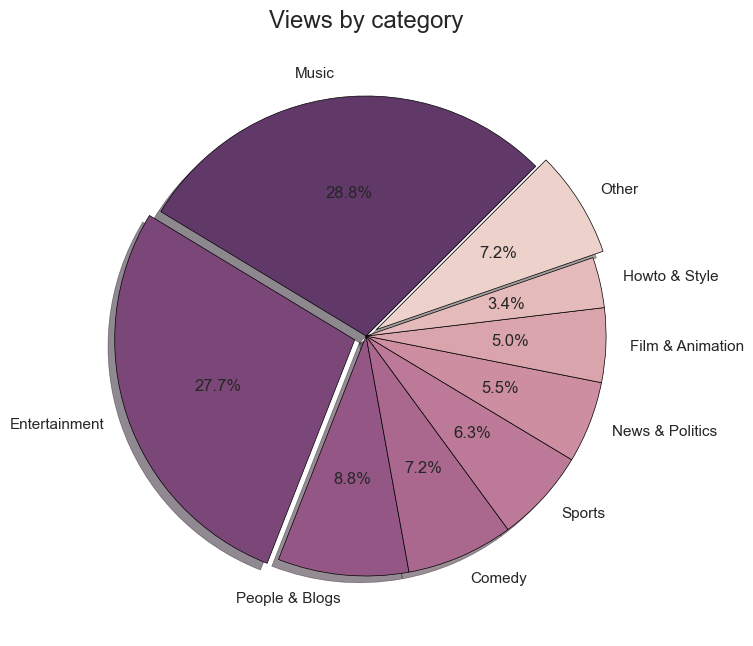

In [39]:
# create slices
slices = [x for x in df1['views'] if x >= 3]
other = sum([x for x in df1['views'] if x < 3])
slices.append(other)

# create labels
labels = list(df1.index[0:len(slices)-1])
labels.append('Other')

# colormap and style
categoryColors = sns.cubehelix_palette(n_colors=len(slices)+2, reverse=True)[2:]
explode = [0 for x in range(len(slices))]
explode[1] = 0.05
explode[-1] = 0.05

# plot
fig, ax = plt.subplots(figsize=(4, 5))
fig.subplots_adjust(0.2,0,2,1.2)
pie = ax.pie(slices, labels=labels,
             wedgeprops={'edgecolor': 'black'},
             colors=categoryColors, explode=explode,
             shadow=True, startangle=45, autopct='%1.1f%%')
title = plt.title('Views by category')


The most viewed categories are Music (28.8%) and Entertainment (27.7%)

## 2.2 Do people in the different countries watch different video categories?

To address this question we will use number of videos for each category in each country. First, let's take top 5 most popular categories for each region:

In [13]:
df1 = pd.pivot_table(df, index = ['country','category'], 
                     values='video_id', aggfunc='count')
df1.rename(columns={'video_id': 'No. videos'}, inplace=True) 
df1 = df1['No. videos'].groupby('country', group_keys=False)
df1.apply(lambda x: x.sort_values(ascending=False).head(5))

country        category        
Canada         Entertainment       13451
               News & Politics      4159
               People & Blogs       4105
               Comedy               3773
               Music                3731
France         Entertainment        9819
               People & Blogs       5719
               Comedy               4343
               Sports               4342
               Music                3946
Germany        Entertainment       15292
               People & Blogs       5988
               News & Politics      2935
               Sports               2752
               Comedy               2534
Great Britain  Music               13754
               Entertainment        9124
               People & Blogs       2926
               Film & Animation     2577
               Howto & Style        1928
India          Entertainment       16712
               News & Politics      5241
               Music                3858
               Comedy    

This table is hard to read, so let's better create a plot. Also we will use percentage of total count :

In [17]:
# calculate percentage of total
df2 = df.groupby(['country', 'category']).agg({'video_id': 'count'})
df2.rename(columns={'video_id': 'No. videos'}, inplace=True)
df2 = df2.groupby(level=0, group_keys=False).apply(
    lambda x: round(100 * x / float(x.sum()), 1))
df2 = df2['No. videos'].groupby('country', group_keys=False)
df2 = df2.apply(lambda x: x.sort_values(ascending=False).head(5)).reset_index()

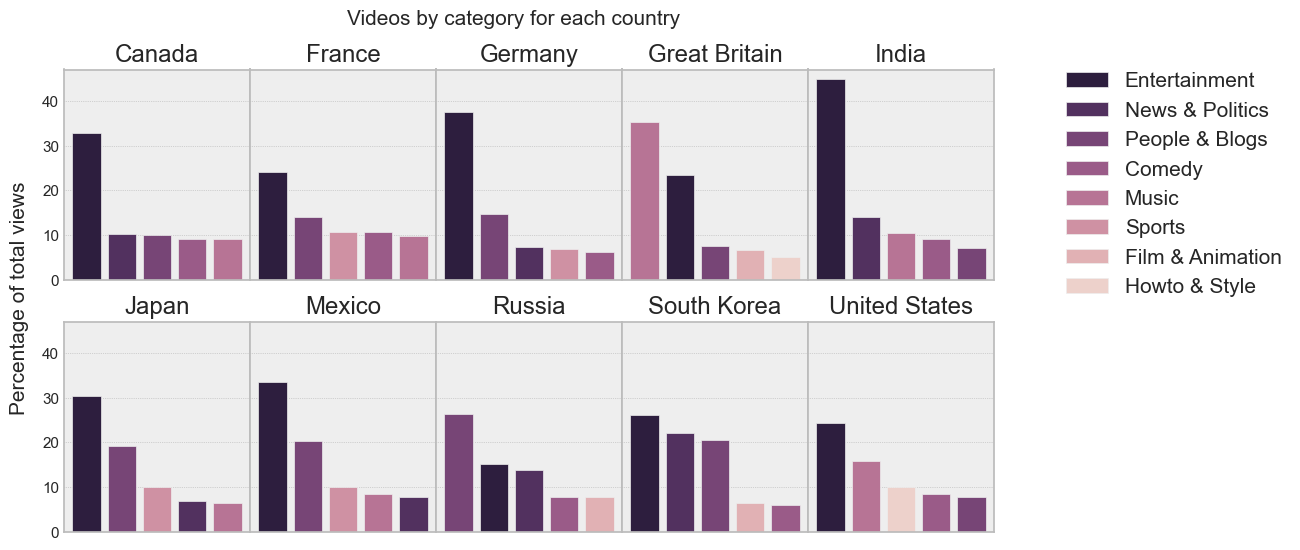

In [44]:
# create colorMap
nColors = df2['category'].nunique()
categoryColors = sns.cubehelix_palette(n_colors=nColors, reverse=True) #sns.color_palette('mako', n_colors=nColors)
category = df2['category'].unique()
colorMap = {category[i]: categoryColors[i] for i, _ in enumerate(category)}
df2['color'] = df2['category'].map(colorMap)

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                        subplot_kw={'xticks': []}, sharey=True)

# auxiliary variables
regionList = df2['country'].unique()
handles = []
labels = []

# plot bar charts
for i, region in enumerate(regionList):
    regionData = df2.groupby(
        'country').get_group(region).reset_index()
    axs.flat[i].bar(regionData['category'], regionData['No. videos'],
                    color=regionData['color'], label=regionData['category'])
    axs.flat[i].grid(visible=True, linestyle='dotted', linewidth=0.5)
    # get handles and labels for legend
    line = axs.flat[i].get_legend_handles_labels()
    for handle in line[0]:
        handles.append(handle)
    for label in line[1]:
        labels.append(label)
    axs.flat[i].set_title(regionData.loc[0, 'country'])
    
# create legend
legendDict = {labels[i]: handles[i] for i, _ in enumerate(labels)}
legend = fig.legend(handles=legendDict.values(), labels=legendDict.keys(),
                    loc="lower center",
                    bbox_to_anchor=(1.05, 0.47), frameon=False, fontsize=15)
fig.subplots_adjust(wspace=0, hspace=0.2)
text = fig.text(0.08, 0.5, 'Percentage of total views', va='center',
                rotation='vertical', fontsize=15)
sup = fig.suptitle('Videos by category for each country',
                   fontsize=15)

As we can see, Entertainment is the most popular category in most countries. However british people prefer Music and russian prefer People & Blogs. Also People & Blogs is included in all top5 ratings. News & Politics is being watched mostly in  South Korea, India, Candada and Russia. Viewers from France, Germany, Japan and Mexico like Sports. People in Russian, Germany and South Korea don't watch Music video a lot. Howto & style is included in trending videos only in USA. Comedy is another popular category in many countries.


# 3. Views, likes, dislikes and comments statistics

## 3.1 Is there a correlation between views, likes, dislikes and number of comments?

First we will filter out videos with disabled comments or likes/dislikes and then calculate correlation matrix:

In [81]:
# create df
filt = (uniqueDF['comments_disabled'] == False) & (uniqueDF['ratings_disabled'] == False)
columns = ['views','likes','dislikes','comment_count']
subDF = uniqueDF.loc[filt,columns]
subDF.rename(columns={'comment_count':'comments'}, inplace=True)

# format output
def highlightCells(val): 
    if val >= 0.65 and val != 1:
        font_color = 'green'
    elif val == 1: font_color = 'grey'
    else: font_color = 'red'
    return f'color: {font_color}'
subDF.corr().style.applymap(highlightCells)

,views,likes,dislikes,comments
views,1.000000,0.770669,0.385183,0.426485
likes,0.770669,1.000000,0.435454,0.700974
dislikes,0.385183,0.435454,1.000000,0.667974
comments,0.426485,0.700974,0.667974,1.000000


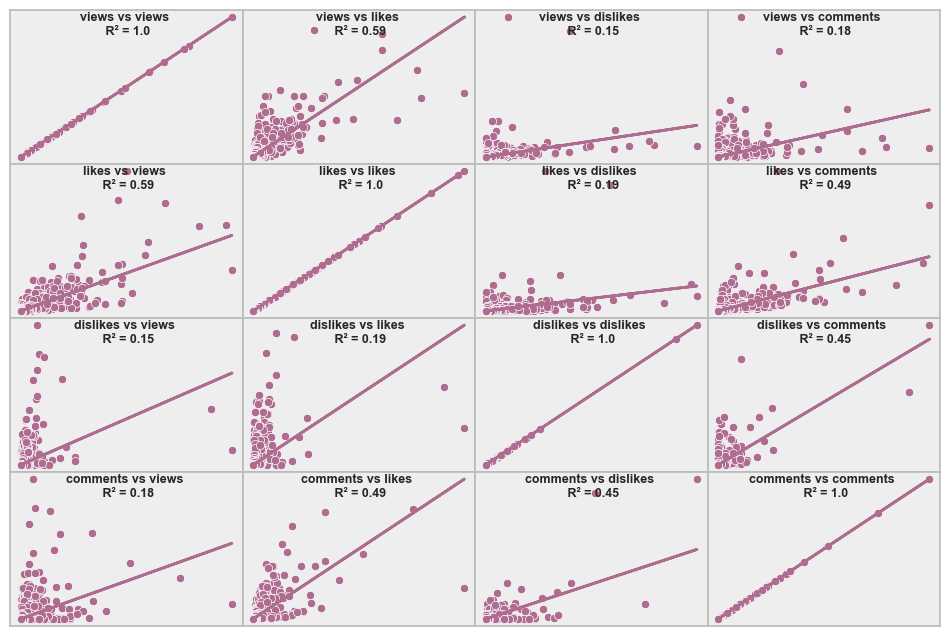

In [42]:
def plotScatterMatrix(df, color):
    fig, axs = plt.subplots(nrows=df.shape[1], ncols=df.shape[1],
                            figsize=(12, 8),
                            subplot_kw={'xticks': [], 'yticks': []})
    plt.rcParams['axes.grid'] = False
    for i, row in enumerate(df.columns):
        for j, column in enumerate(df.columns):
            x = df[row]
            y = df[column]
            sns.scatterplot(x=x, y=y, ax=axs[i, j], color=color)
            # calculate regression line
            a, b, r,  *_ = stats.linregress(x, y)
            axs[i, j].plot(x, a*x+b, color=color) 
            rSquared = round(r**2, 2)
            # set title
            axs[i, j].set_title(f'{row} vs {column} \n R\u00b2 = {rSquared}',
                               fontsize=9, weight='bold', y=1.0, pad=-18)
    fig.subplots_adjust(wspace=0, hspace=0)


color = sns.cubehelix_palette(n_colors=20)[9]
plotScatterMatrix(subDF, color)

There is a strong correlation between views and likes - videos with more views are getting more likes. However high number of views isn't associated with high number of dislikes or comments. Suprisingly likes don't correlate with dislikes strongly. Also people often comment videos they have liked/disliked.

## 3.2 Views, likes, dislikes, comments ratios per category

Does like/dislike ratio vary for each category?

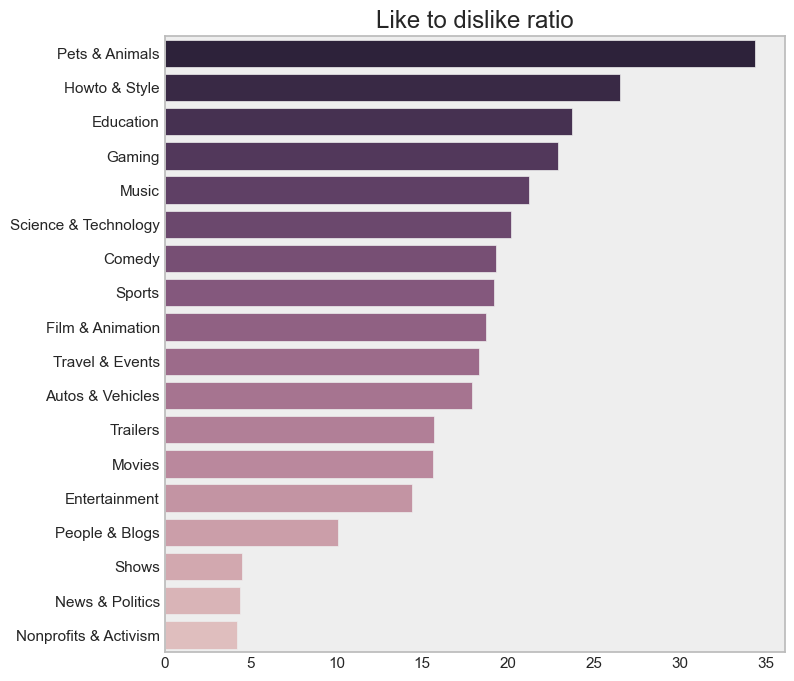

In [34]:
filt = uniqueDF['ratings_disabled'] == False
df1 = uniqueDF[filt]
df1 = df1.groupby(['category']).agg({'likes': 'sum',
                   'dislikes': 'sum'}).apply(lambda x: round(x[0]/x[1],1), 
                    axis=1).sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,8))
nColors = df1.index.nunique()
bar = sns.barplot(x=df1.values, y=df1.index,
                  palette=sns.cubehelix_palette(n_colors=20, 
                                              reverse=True), ax=ax)
title = ax.set_title('Like to dislike ratio')
ylabel = plt.ylabel(None)

Does  like/view ratio vary for each category?

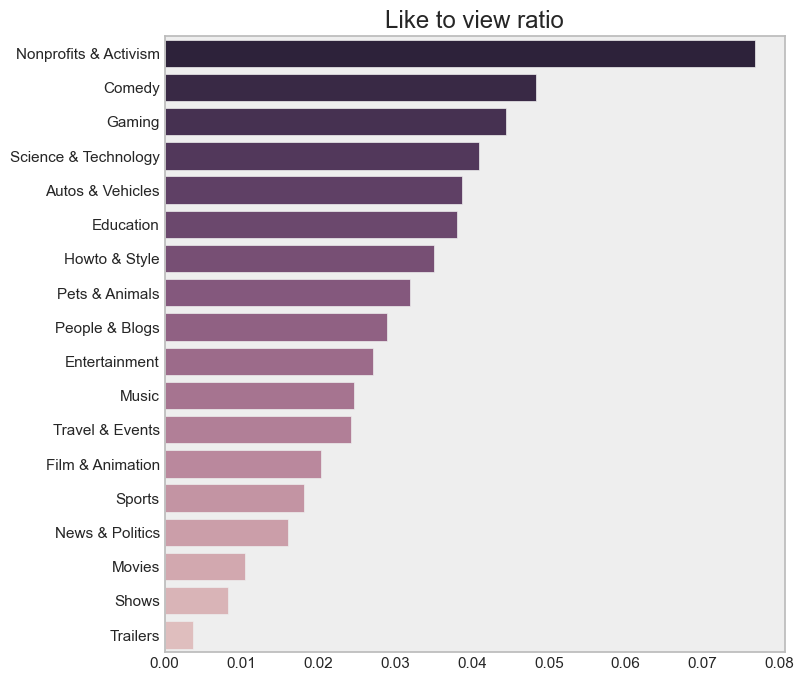

In [23]:
filt = uniqueDF['ratings_disabled'] == False
df1 = uniqueDF[filt]
df1 = df1.groupby(['category']).agg({'likes':'sum',
                   'views':'sum'}).apply(lambda x: (x[0]/x[1]), 
                    axis=1).sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,8))
bar = sns.barplot(x=df1.values, y=df1.index,
                palette=sns.cubehelix_palette(n_colors=20, 
                                              reverse=True), ax=ax)
title = ax.set_title('Like to view ratio')
ylabel = plt.ylabel(None)

Does  comment/view ratio vary for each category?

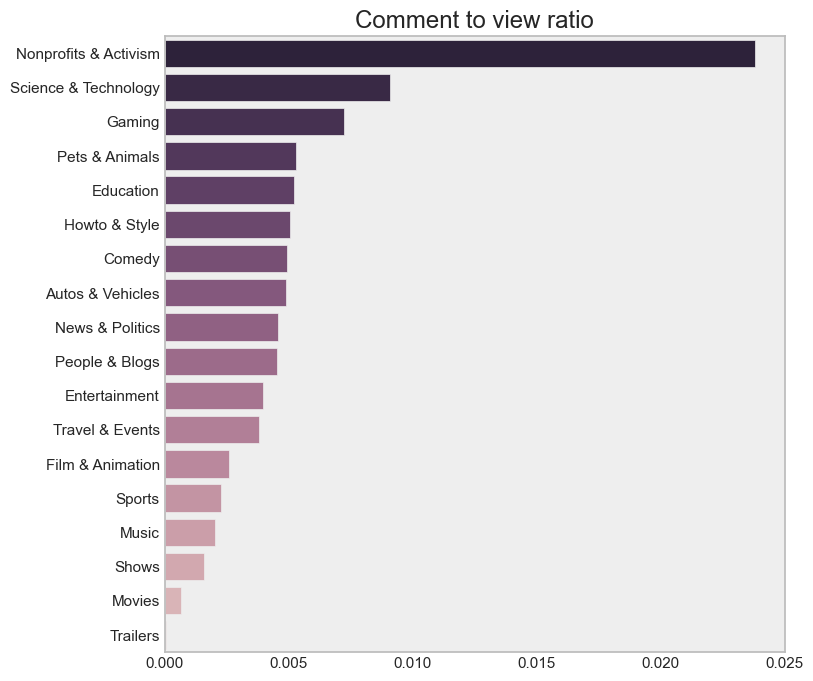

In [46]:
filt = (uniqueDF['ratings_disabled'] == False) & (uniqueDF['comments_disabled'] == False)
df1 = uniqueDF[filt]
df1 = df1.groupby(['category']).agg({'comment_count':'sum',
                   'views':'sum'}).apply(lambda x: (x[0]/x[1]), 
                    axis=1).sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,8))
bar = sns.barplot(x=df1.values, y=df1.index,
                palette=sns.cubehelix_palette(n_colors=20, 
                                              reverse=True), ax=ax)
title = ax.set_title('Comment to view ratio')
ylabel = plt.ylabel(None)

## 3.3 Views, likes, dislikes, comments ratios per region

Does like/dislike ratio vary for each country? This time we will identify each video with combination of video_id, title and country.

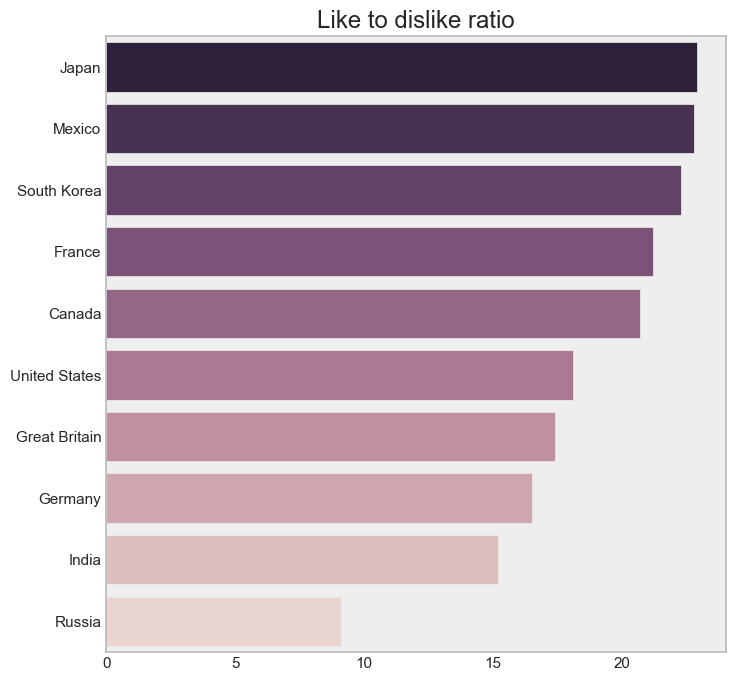

In [90]:
df1 = df.sort_values(by='trending_date', ascending=False)
df1 = df1.drop_duplicates(['video_id', 'title', 'country'], keep='first')
filt = df1['ratings_disabled'] == False
df1 = df1[filt]
df1 = df1.groupby(['country']).agg({'likes': 'sum',
                   'dislikes': 'sum'}).apply(lambda x: round(x[0]/x[1],1),
                    axis=1).sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,8))
nColors = df1.index.nunique()
bar = sns.barplot(x=df1.values, y=df1.index,
                  palette=sns.cubehelix_palette(n_colors=10,
                                              reverse=True), ax=ax)
title = ax.set_title('Like to dislike ratio')
ylabel = plt.ylabel(None)

Does like/view ratio vary for each country?

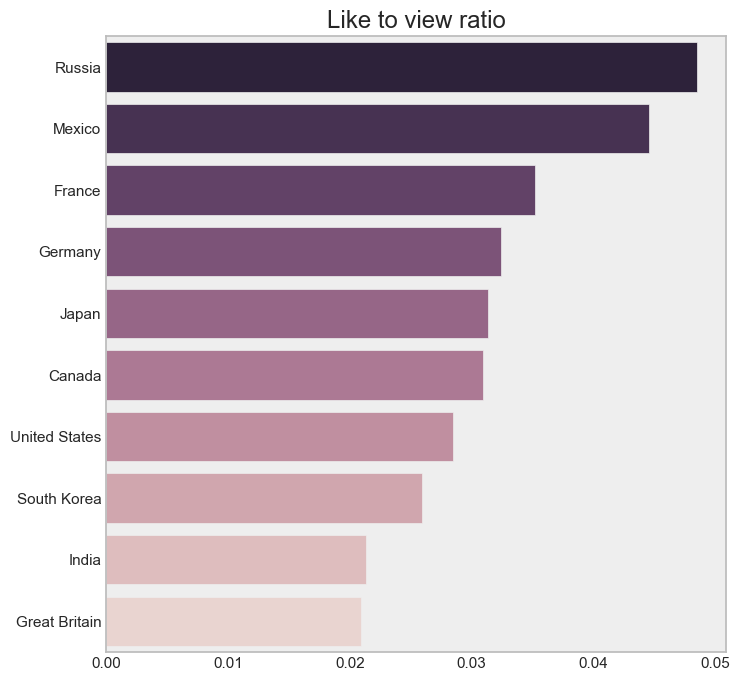

In [91]:
df1 = df.sort_values(by='trending_date', ascending=False)
df1 = df1.drop_duplicates(['video_id', 'title', 'country'], keep='first')
filt = df1['ratings_disabled'] == False
df1 = df1[filt]
df1 = df1.groupby(['country']).agg({'likes':'sum',
                   'views':'sum'}).apply(lambda x: (x[0]/x[1]), 
                    axis=1).sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,8))
bar = sns.barplot(x=df1.values, y=df1.index,
                palette=sns.cubehelix_palette(n_colors=10, 
                                              reverse=True), ax=ax)
title = ax.set_title('Like to view ratio')
ylabel = plt.ylabel(None)

Does  comment/view ratio vary for each country?

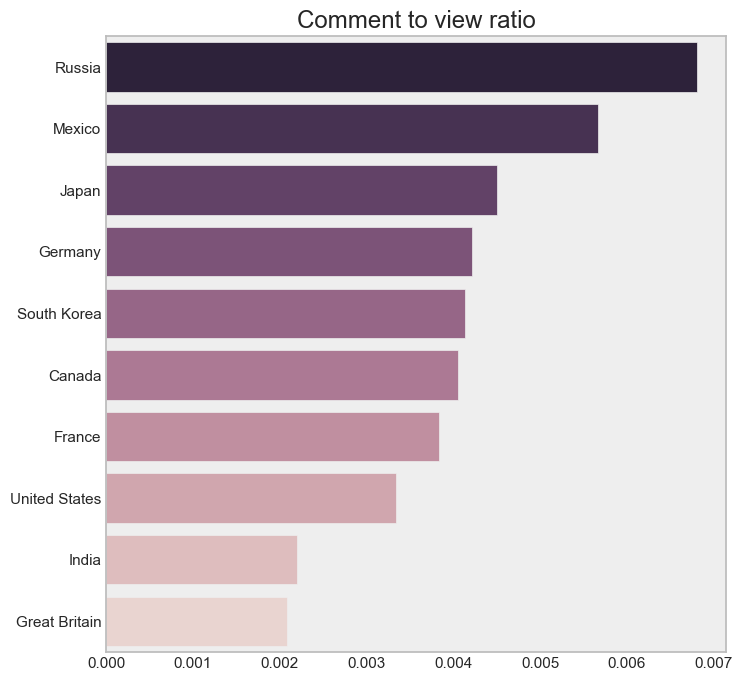

In [92]:
df1 = df.sort_values(by='trending_date', ascending=False)
df1 = df1.drop_duplicates(['video_id', 'title', 'country'], keep='first')
filt = (df1['ratings_disabled'] == False) & (df1['comments_disabled'] == False)
df1 = df1[filt]
df1 = df1.groupby(['country']).agg({'comment_count':'sum',
                   'views':'sum'}).apply(lambda x: (x[0]/x[1]), 
                    axis=1).sort_values(ascending=False) 

fig, ax = plt.subplots(figsize=(8,8))
bar = sns.barplot(x=df1.values, y=df1.index,
                palette=sns.cubehelix_palette(n_colors=10, 
                                              reverse=True), ax=ax)
title = ax.set_title('Comment to view ratio')
ylabel = plt.ylabel(None)

In [72]:

filt = (uniqueDF['ratings_disabled'] == False) & (uniqueDF['region']=='IN') & (uniqueDF['comments_disabled'] == False)
df1 = uniqueDF[filt]
likes = df1['comment_count'].sum()
views = df1.views.sum()
likes/views

0.0019767424427054384